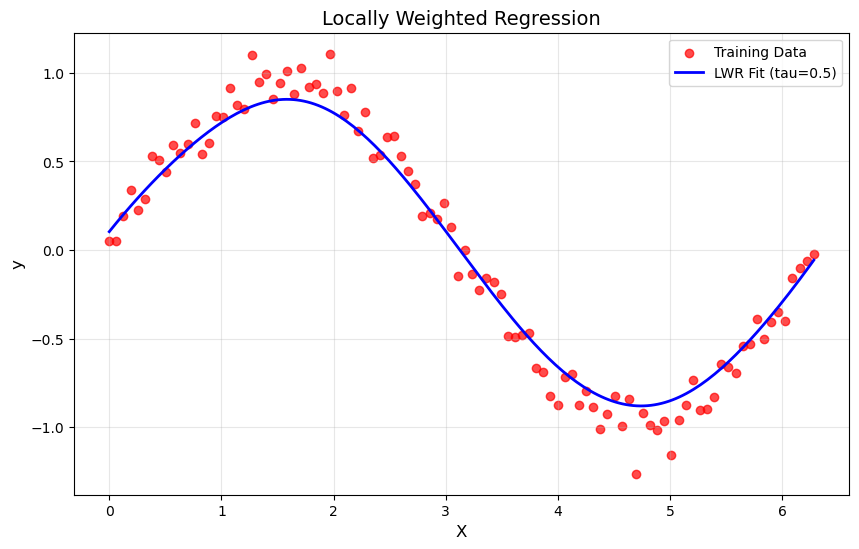

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))
def lwr(x, X, y, tau):
    W = np.diag([kernel(x, xi, tau) for xi in X])
    theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
    return x @ theta
np.random.seed(42)
X = np.linspace(0, 2*np.pi, 100)
y = np.sin(X) + 0.1*np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]
x_test = np.linspace(0, 2*np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5
y_pred = [lwr(xi, X_bias, y, tau) for xi in x_test_bias]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})')
plt.xlabel('X'); plt.ylabel('y'); plt.title('Locally Weighted Regression')
plt.legend(); plt.grid(True)
plt.show()
